In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 确保matplotlib能够显示中文
mpl.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
# 确保matplotlib能够正常显示负号
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
# 加载训练数据集
tds = np.loadtxt('dataset_一元线性回归.csv', delimiter=',', dtype='int', skiprows=1)
tds_x = tds[:,0]
tds_y = tds[:,1]
tds_x_mean = tds_x.mean()
tds_x_std = tds_x.std()
# 标准化

std_tds_x = (tds_x - tds_x_mean) / tds_x_std

train_x = np.vstack([np.ones(std_tds_x.shape[0]), std_tds_x]).T
train_x

array([[ 1.        ,  1.39433428],
       [ 1.        ,  1.11069026],
       [ 1.        ,  0.09554325],
       [ 1.        , -1.59139223],
       [ 1.        , -0.8449606 ],
       [ 1.        ,  0.93154667],
       [ 1.        , -1.38239138],
       [ 1.        , -1.74067856],
       [ 1.        ,  0.46875906],
       [ 1.        ,  0.73747445],
       [ 1.        , -0.11345761],
       [ 1.        , -0.63595975],
       [ 1.        , -0.36724436],
       [ 1.        , -0.44188752],
       [ 1.        ,  0.3045441 ],
       [ 1.        ,  1.94669369],
       [ 1.        ,  0.25975821],
       [ 1.        ,  0.25975821],
       [ 1.        , -1.23310505],
       [ 1.        ,  0.84197488]])

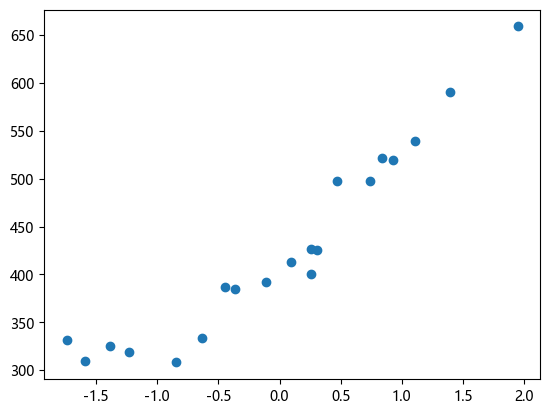

In [3]:
# 适用训练数据集绘制散点图看数据分布
plt.scatter(std_tds_x, tds_y)

In [4]:
# 拟合直线函数
def f(theta, x):
    return np.dot(x, theta.T)

# 成本函数
def J(theta, train_x, tds_y):
    m = len(train_x)
    return np.sum(np.power(f(theta, train_x) - tds_y, 2)) / 2 / m

# 下面两个是偏导数
def pd_theta(theta, train_x, tds_y):
    m = len(train_x)
    return np.dot((f(theta, train_x) - tds_y), train_x) / m

In [5]:
eta = 5e-2
theta = np.array([0, 0])
lst_iter_cnt = []
lst_cost = []
print(f(theta, train_x) - tds_y)
j_cost_cur = J(theta, train_x, tds_y)
for i in range(200):
    j_cost_pre = j_cost_cur
    tmp_theta = theta - eta * pd_theta(theta, train_x, tds_y)
    
    theta = tmp_theta
    
    j_cost_cur = J(theta, train_x, tds_y)
    
    lst_iter_cnt.append(i)
    lst_cost.append(j_cost_cur)
    
    print(i, theta, lst_cost[i])

[-591. -539. -413. -310. -308. -519. -325. -332. -498. -498. -392. -334.
 -385. -387. -425. -659. -400. -427. -319. -522.]
0 [21.4575     4.6739384] 87526.90987559463
1 [41.842125    9.11417987] 79039.56060081879
2 [61.20751875 13.33240927] 71379.72788033358
3 [79.60464281 17.33972721] 64466.72885009569
4 [97.08191067 21.14667924] 58227.74722530598
5 [113.68531514  24.76328368] 52597.06630893329
6 [129.45854938  28.19905789] 47515.37678190692
7 [144.44312191  31.46304339] 42929.15198376563
8 [158.67846582  34.56382962] 38790.08410344311
9 [172.20204253  37.50957653] 35054.57534145203
10 [185.0494404  40.3080361] 31683.278683755092
11 [197.25446838  42.96657269] 28640.6834501836
12 [208.84924496  45.49218245] 25894.74125188533
13 [219.86428271  47.89151173] 23416.528417921138
14 [230.32856858  50.17087454] 21179.941335268453
15 [240.26964015  52.33626921] 19161.421493174403
16 [249.71365814  54.39339414] 17339.707335684532
17 [258.68547523  56.34766283] 15695.610308549924
18 [267.208701

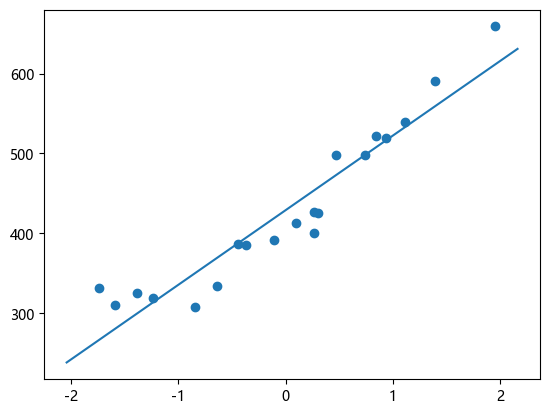

In [6]:
plt.scatter(std_tds_x, tds_y)
x = np.arange(np.min(std_tds_x)-0.3, np.max(std_tds_x)+0.3, 0.1)
y = f(theta, np.vstack([np.ones(x.shape[0]), x]).T)
plt.plot(x, y)

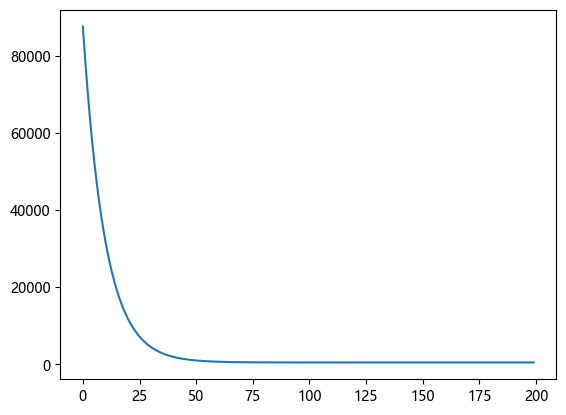

In [7]:
plt.plot(lst_iter_cnt, lst_cost)

In [8]:
# 以下的公式推导可自行思考
theta_not_scaled = theta / tds_x.std()
theta_not_scaled[0] = theta[0] - np.sum(theta[1:] * tds_x.mean() / tds_x.std())
print(theta_not_scaled)


def f_not_scaled(theta_not_scaled, x):
    return np.dot([1, x], theta_not_scaled.T)

print("x为198时，y的预测值：", f_not_scaled(theta_not_scaled, 216))

[231.53764215   1.39546126]
x为198时，y的预测值： 532.9572751956938


In [9]:
plt.scatter(tds_x, tds_y)
x = np.arange(np.min(tds_x), np.max(tds_x), 1)

def f_not_scaled2(theta_not_scaled, x):
    return np.dot(x, theta_not_scaled.T)

y = f_not_scaled2(theta_not_scaled, np.vstack([np.ones(x.size), x]).T)

plt.plot(x, y)